**[Deep Learning Home Page](https://www.kaggle.com/learn/deep-learning)**

---


In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
#resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg')) #weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Indicate whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = False



In [3]:
# step_1.hint()
# step_1.solution()
my_new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


# 2) Compile the Model

You now compile the model with the following line.  Run this cell.

In [4]:
my_new_model.compile(optimizer='sgd', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

That ran nearly instantaneously.  Deep learning models have a reputation for being computationally demanding.  Why did that run so quickly?

After thinking about this, check your answer by uncommenting the cell below.

In [ ]:
# Check your answer (Run this code cell to receive credit!)
step_2.solution()

# 3) Review the Compile Step
You provided three arguments in the compile step.  
- optimizer
- loss
- metrics

Which arguments could affect the accuracy of the predictions that come out of the model?  After you have your answer, run the cell below to see the solution.

In [ ]:
# Check your answer (Run this code cell to receive credit!)
step_3.solution()

# 4) Fit Model

**Your training data is in the directory `../input/dogs-gone-sideways/images/train`. The validation data is in `../input/dogs-gone-sideways/images/val`**. Use that information when setting up `train_generator` and `validation_generator`.

You have 220 images of training data and 217 of validation data.  For the training generator, we set a batch size of 10. Figure out the appropriate value of `steps_per_epoch` in your `fit_generator` call.

Fill in all the blanks (again marked as `____`).  Then run the cell of code.  Watch as your model trains the weights and the accuracy improves.

In [9]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocess_input)

train_generator = data_generator.flow_from_directory(
                                        directory='../input/cars-wagonr-swift/data/train',
                                        target_size=(image_size, image_size),
                                        batch_size=10,
                                        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
                                        directory='../input/cars-wagonr-swift/data/validation',
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')

# fit_stats below saves some statistics describing how model fitting went
# the key role of the following line is how it changes my_new_model by fitting to data
fit_stats = my_new_model.fit_generator(train_generator,
                                       steps_per_epoch=22,
                                       validation_data=validation_generator,
                                       validation_steps=1)


Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
22/22 [==============================] - 1s 68ms/step - loss: 0.6445 - accuracy: 0.7455 - val_loss: 0.3286 - val_accuracy: 0.9375


In [10]:
my_new_model.fit(train_generator,epochs=10,batch_size=128,validation_data=validation_generator)

Epoch 1/10
240/240 [==============================] - 16s 68ms/step - loss: 0.3366 - accuracy: 0.8650 - val_loss: 0.1992 - val_accuracy: 0.9287
Epoch 2/10
240/240 [==============================] - 13s 55ms/step - loss: 0.1787 - accuracy: 0.9287 - val_loss: 0.1909 - val_accuracy: 0.9212
Epoch 3/10
240/240 [==============================] - 13s 53ms/step - loss: 0.1345 - accuracy: 0.9483 - val_loss: 0.1551 - val_accuracy: 0.9337
Epoch 4/10
240/240 [==============================] - 14s 59ms/step - loss: 0.1200 - accuracy: 0.9525 - val_loss: 0.1216 - val_accuracy: 0.9613
Epoch 5/10
240/240 [==============================] - 13s 55ms/step - loss: 0.0938 - accuracy: 0.9679 - val_loss: 0.1462 - val_accuracy: 0.9438
Epoch 6/10
240/240 [==============================] - 13s 53ms/step - loss: 0.0903 - accuracy: 0.9658 - val_loss: 0.1591 - val_accuracy: 0.9312
Epoch 7/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0749 - accuracy: 0.9737 - val_loss: 0.1368 - val_accuracy:

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [36]:
def predict(var):
    global rslt
    img_prd=image.load_img(var,target_size=(224,224))
    img_prd=image.img_to_array(img_prd)
    img_prd=np.expand_dims(img_prd,axis=0)
    rslt=int(my_new_model.predict_classes(img_prd) )
    y={0:'swift',1:'wagonr'}
    return rslt,y[rslt]

In [37]:
a='../input/cars-wagonr-swift/data/test/wagonr/04sbsrsxi6q21-IN.jpg'

In [38]:
predict(a)

(1, 'wagonr')

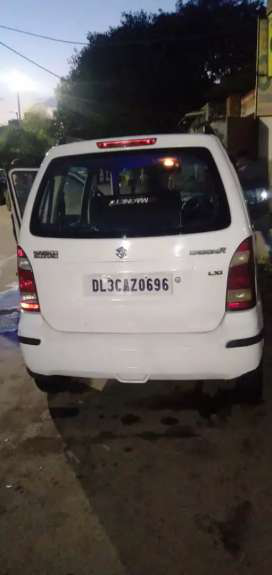

In [45]:
Image.open(a)